- Data collection- csv,DB (sql),datawarehouse,data lake(Big data)
- read data - csv,json,xl,html

- Data preprocessing
 - Duplicates - repeated data
 - Null or NaN
 - Outlier
 

# Data Preprocessing

- Duplicate
     - Drop dupliacte
---
- Null or NaN
    - Remove
      - when there is less data
    - Replace
        - Cap with median
        - **cap with imputation**
 ---
- Outlier 
  - (wrong / extreme (low or high) data) --- Normal distribution (Emprical formula)m
        
    - IQR
      - Trimming (Remove)
          - when there is less outlier  
      - Caping (Replace)
        - when there is medium count outlier and without loss of data
        - Cap with lower range and upper range
        - Cap with median
        - **cap with imputation**
        - NOTE: Cap has to done without affecting the distirbution of the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('hypothyroid.csv')

In [3]:
pd.options.display.max_columns=1000
df.sample(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
1053,39,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.1,t,2,t,89,t,1.14,t,79,f,?,other,negative
1612,46,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.3,t,2.2,t,187,t,1.1,t,170,f,?,other,negative
224,79,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,143,t,0.7,t,73,t,1.01,t,72,f,?,other,compensated_hypothyroid
2068,42,F,t,f,f,f,f,f,f,t,f,f,f,f,f,f,t,2.9,f,?,t,141,t,1.08,t,131,f,?,other,negative
2743,24,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.09,f,?,t,126,t,0.86,t,146,f,?,other,negative


In [4]:
df.shape

(3772, 30)

In [5]:
df.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772.000000,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3766,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,NaN,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,4
top,NaN,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative
freq,NaN,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,363,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,3481
mean,52.457052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,29.080463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   int64 
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

## Dupliacte

In [7]:
df=df.drop_duplicates()

In [8]:
df['age'].unique()

array([ 41,  23,  46,  70,  18, 593,  80, 669,  68,  84,  67,  71,  59,
        28,  65,  42,  63,  51,  81,  54,  55,  60,  25,  73,  34,  78,
        37,  85,  26,  58,  64,  44,  48,  61,  35,  83,  21,  87,  53,
        77,  27,  69,  74,  38,  66,  76,  45,  36,  22, -11,  43,  72,
        82,  31,  39,  49,  62,  57,   1,  50,  30,  29,  75,  19,   7,
        79,  17,  24,  15,  32,  47,  16,  52,  33,  13,  10,  89,  56,
        20,  90,  40,  88,  14,  86,  94,  12,   4,  11,   8,   5, 455,
         2,  91,   6,  93,  92, 618, 643], dtype=int64)

# NULL and NaN

In [71]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          6
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

## Drop

In [73]:
drop_df=df.copy()
drop_df.shape

(3712, 30)

In [74]:
drop_df=df.dropna()

In [75]:
drop_df.shape

(3706, 30)

In [76]:
drop_df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

## Replace


In [78]:
replace_df=df.copy()

In [80]:
replace_df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          6
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

In [83]:
replace_df=replace_df.fillna(median)

In [84]:
replace_df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

<Axes: xlabel='age', ylabel='age'>

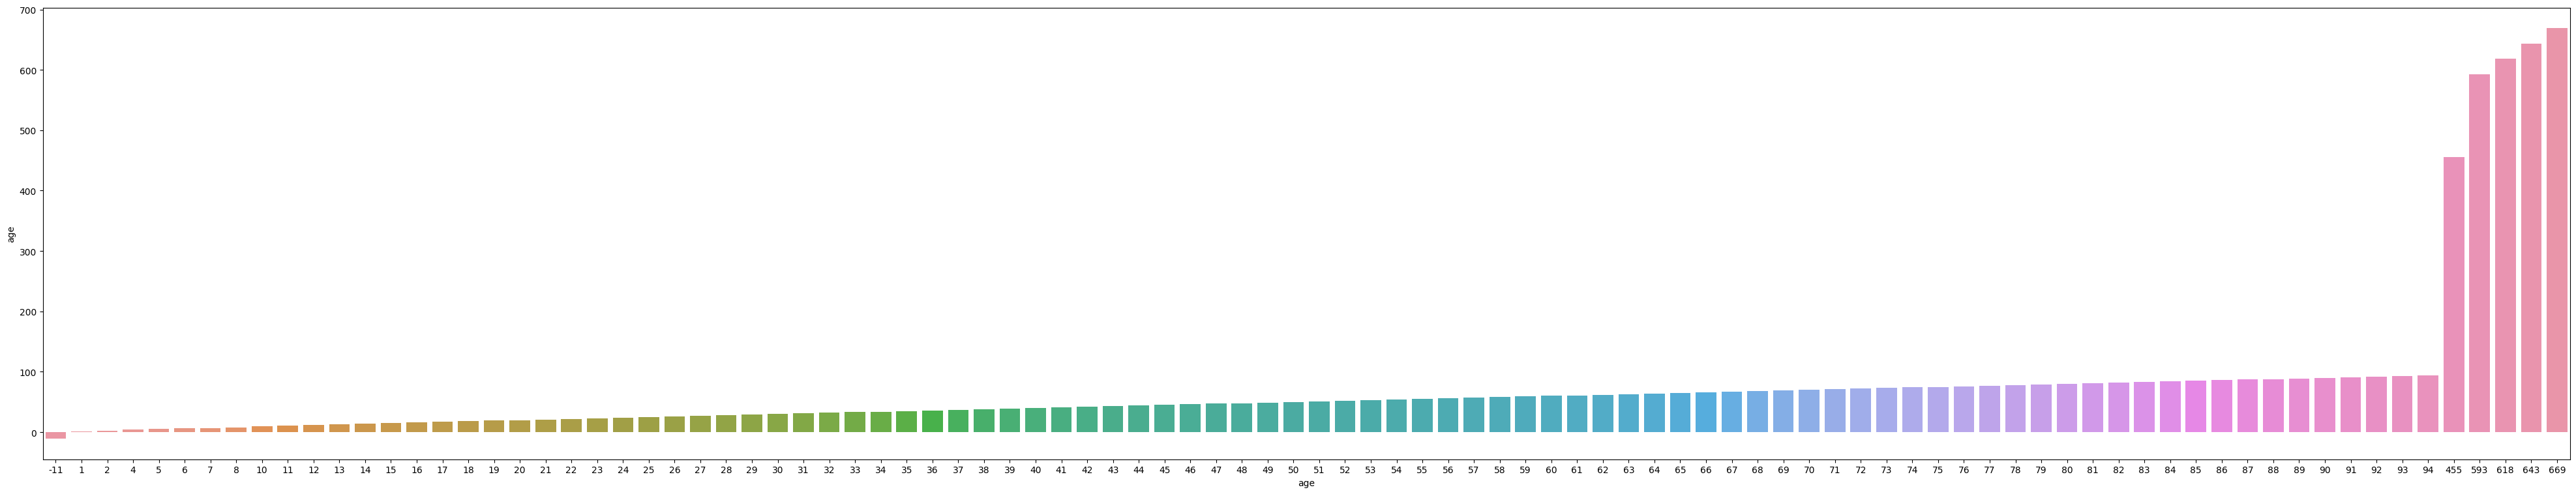

In [9]:
plt.figure(figsize=(50,9))

sns.barplot(df,x='age',y='age')

In [10]:
df['age'].max()

669

In [11]:
df['age'].min()

-11

In [12]:
df[df.age==669]
#

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
8,669,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,0.6,t,2.2,t,123,t,0.93,t,132,f,?,SVI,negative


In [13]:
df[df['age']>94]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
6,593,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,?,t,72,t,0.92,t,78,f,?,other,negative
8,669,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,0.6,t,2.2,t,123,t,0.93,t,132,f,?,SVI,negative
1364,455,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.1,t,2,t,118,t,1.13,t,104,f,?,SVI,negative
3759,618,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.2,t,2.3,t,112,t,1.01,t,111,f,?,other,negative
3762,618,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,t,1,t,72,t,0.7,t,103,f,?,other,negative
3771,643,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.2,t,99,t,1.07,t,92,f,?,other,negative


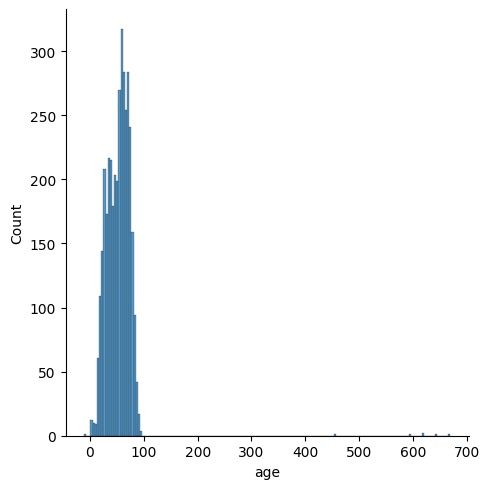

In [14]:
#sns.displot(df,x="age")
sns.displot(df['age'],kind='hist')

<Axes: xlabel='age', ylabel='Count'>

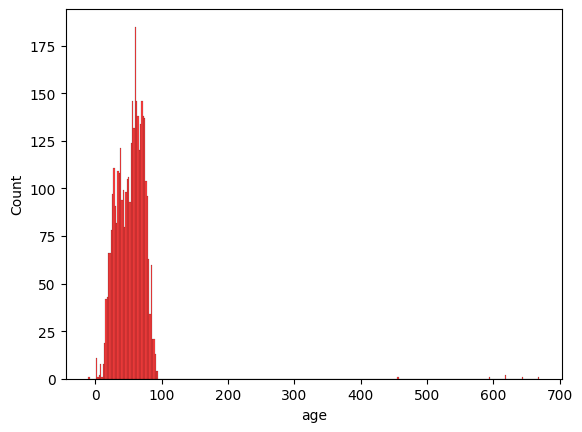

In [15]:
sns.histplot(df['age'],binwidth=2,color='r')

<Axes: xlabel='age', ylabel='Density'>

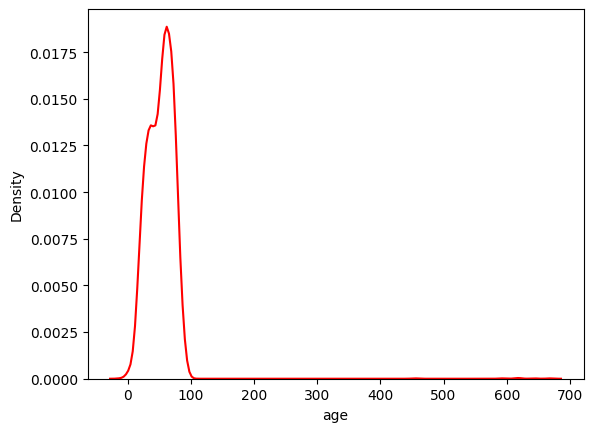

In [16]:
sns.kdeplot(df['age'],color='r')

<Axes: xlabel='age'>

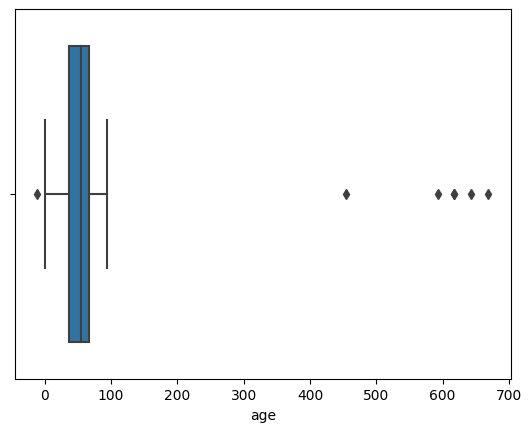

In [17]:
sns.boxplot(x=df['age'])

In [18]:
df['age'].describe()

count    3712.000000
mean       52.596444
std        29.225185
min       -11.000000
25%        36.000000
50%        54.000000
75%        67.000000
max       669.000000
Name: age, dtype: float64

In [19]:
df['age'].quantile(0)

-11.0

In [20]:
df['age'].quantile(0.25)


36.0

In [21]:
df['age'].quantile(0.50)  #median

54.0

In [22]:
df['age'].quantile(0.75)

67.0

In [23]:
df['age'].quantile(1)

669.0

# IQR

In [24]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)

In [25]:
IQR = q3-q1

In [26]:
IQR

31.0

In [27]:
lower_range=q1-1.5*IQR

In [28]:
lower_range

-10.5

In [29]:
upper_range = q3+1.5*IQR

In [30]:
upper_range

113.5

## Trimming 

In [31]:
trimming_data=df[(df['age']>lower_range) & (df['age']<upper_range) ]

In [32]:
trimming_data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,8.8,t,2.7,t,108,t,1.11,t,97,f,?,other,compensated_hypothyroid
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,negative


<Axes: xlabel='age', ylabel='Density'>

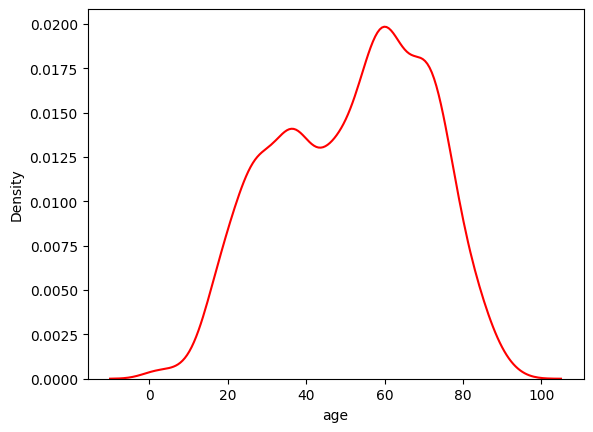

In [33]:
sns.kdeplot(trimming_data['age'],color='r')

<Axes: xlabel='age', ylabel='Count'>

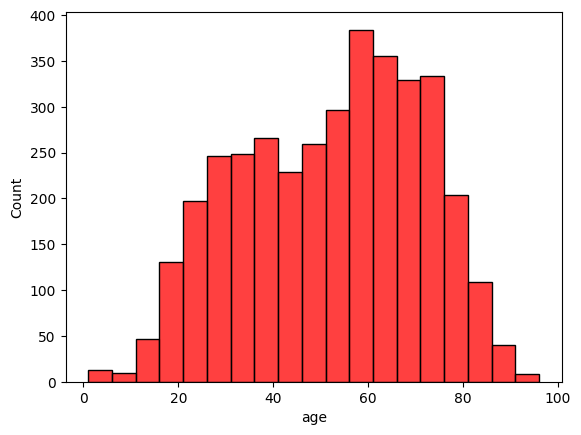

In [34]:
sns.histplot(trimming_data['age'],color='r',binwidth=5)

<Axes: xlabel='age'>

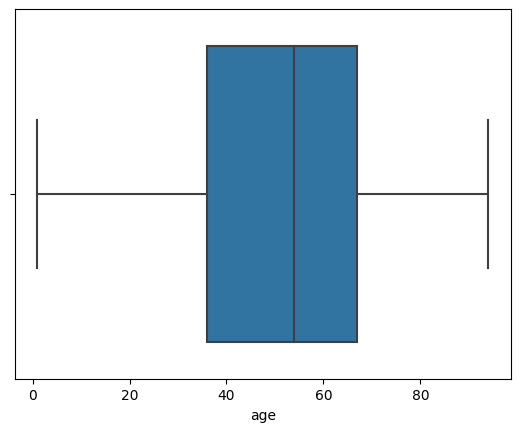

In [35]:
sns.boxplot(x=trimming_data['age'])

### Capping

In [36]:
lower_range


-10.5

In [37]:
capping_range=df.copy()

In [38]:
capping_range['age']=np.where(capping_range['age'] < lower_range,lower_range,
          np.where(capping_range['age'] > upper_range,upper_range,
                   capping_range['age'])
                  )

In [39]:
capping_range['age'].min()

-10.5

In [40]:
capping_range['age'].max()

113.5

In [41]:
capping_range['age'].mean()

51.81128771551724

In [42]:
capping_range['age']


0        41.0
1        23.0
2        46.0
3        70.0
4        70.0
        ...  
3767     30.0
3768     68.0
3769     74.0
3770     72.0
3771    113.5
Name: age, Length: 3712, dtype: float64

<Axes: xlabel='age', ylabel='Density'>

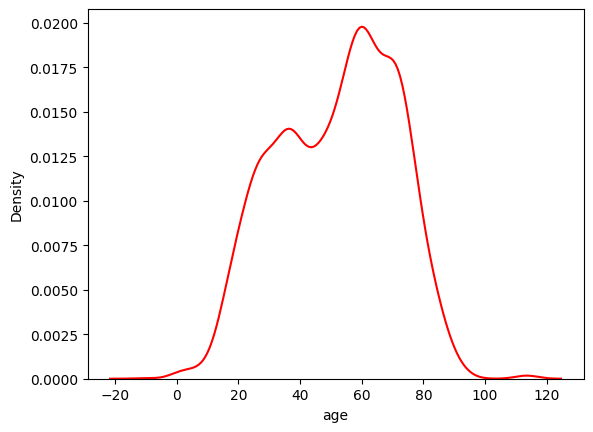

In [43]:
sns.kdeplot(capping_range['age'],color='r')

<Axes: xlabel='age'>

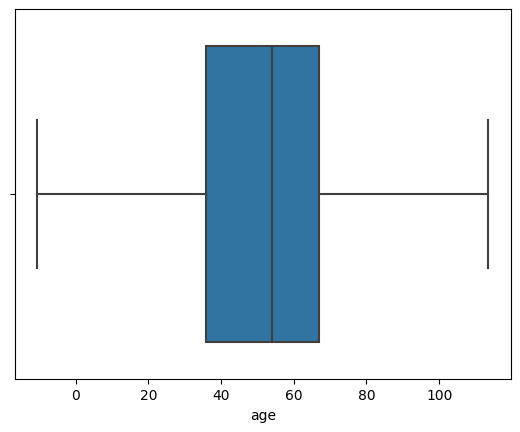

In [44]:
sns.boxplot(x=capping_range['age'])

<Axes: xlabel='age', ylabel='Count'>

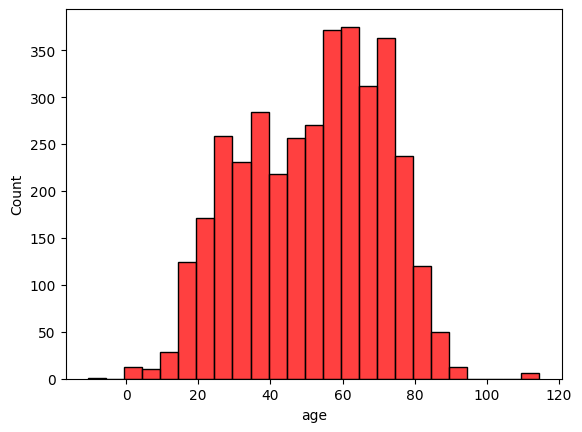

In [45]:
sns.histplot(capping_range['age'],color='r',binwidth=5)

In [48]:
# capping with median

capping_median=df.copy()

In [49]:
capping_median

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,negative


In [50]:
median=capping_median['age'].median()
median

54.0

In [53]:
capping_median['age']=np.where(capping_median['age'] < lower_range,median,
          np.where(capping_median['age'] > upper_range,median,
                   capping_median['age'])
                  )

<Axes: xlabel='age', ylabel='Density'>

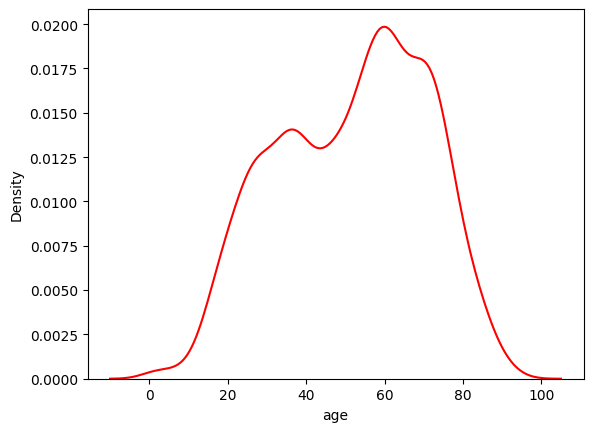

In [61]:
sns.kdeplot(capping_median['age'],color='r')

<Axes: xlabel='age'>

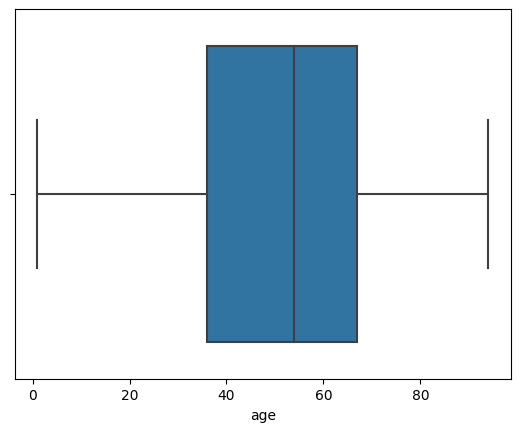

In [62]:
sns.boxplot(x=capping_median['age'])

<Axes: xlabel='age', ylabel='Count'>

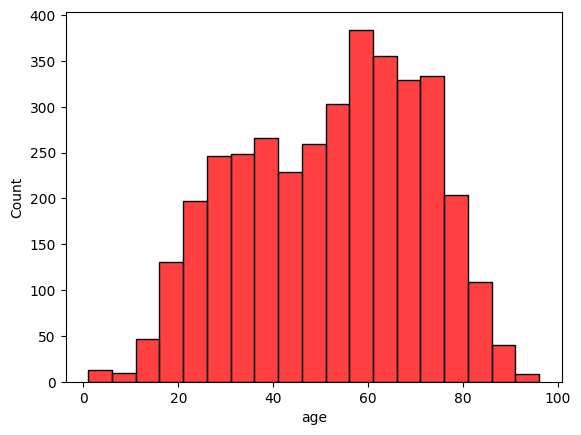

In [63]:
sns.histplot(capping_median['age'],color='r',binwidth=5)

In [59]:
capping_median['age'].min()

1.0

In [60]:
capping_median['age'].max()

94.0

In [64]:
capping_median

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
3768,68.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,negative
3770,72.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,negative


# Using Standard deviation

In [67]:

std_df=df.copy()
lower_limit = std_df["age"].mean() - (3 * std_df["age"].std())
upper_limit = std_df["age"].mean() + (3 * std_df["age"].std())

print(lower_limit)
print(upper_limit)

-35.079110005309644
140.27199793634412
